# Imports



In [1]:
pip install columnar #package to print table of data 

In [2]:
import sys
import math
import time
import matplotlib.pyplot as plt
from columnar import columnar

# Handy functions

In this section we define some useful functions for our algorithm implementations.

In [3]:
def read_input_times(filepath):
  f = open(filepath, "r")
  lines = f.readlines()
  sizes = []
  times = []
  for index, line in enumerate (lines):
    text = line.strip()
    text_splitted = text.split(",")
    sizes.append(int(text_splitted[0].replace('(','')))
    times.append(float(text_splitted[1].replace(')','')))
  return times,sizes

In [4]:
def read_input_data(filepath):
  f = open(filepath, "r")
  lines = f.readlines()
  num_vertices = []
  num_edges = []
  for index, line in enumerate (lines):
    text = line.strip()
    text_splitted = text.split(" ")
    num_vertices.append(int(text_splitted[0]))
    num_edges.append(int(text_splitted[1]))
  return num_vertices,num_edges

In [5]:
def read_input_times_kruskal(filepath):

  f = open(filepath, "r")

  lines = f.readlines()

  sizes = []

  times = []

  for index, line in enumerate (lines):

    text = line.strip()

    text_splitted = text.split(" ")

    sizes.append(int(text_splitted[0]))

    times.append(int(text_splitted[1]))

  return times,sizes

In [8]:
# This is just a handy function to get results of previous experiments that we
# stored in a text file so to avoid having to run the code multiple times
run_times_prim,sizes =read_input_times('/content/Prim-1000it-25-04-22.txt') 
num_vertices,num_edges = read_input_data('/content/vertices-edges.txt') #gets number of nodes and edges from input graph
run_times_kruskal,sizes =read_input_times('/content/Kruskal-Union-1000it.txt') 
run_times_naive_kruskal,sizes =read_input_times_kruskal('/content/naive_kruskal_tuples.txt') 


# Comparing results

In [9]:
tuples_prim = []
for size,runtime in zip(sizes,run_times_prim):
  tuples_prim.append((size,runtime)) # here we store the sorted sizes and the respective running times
tuples_prim.sort(key=lambda y:y[0])

In [10]:
tuples_kruskal = []
for size,runtime in zip(sizes,run_times_kruskal):
  tuples_kruskal.append((size,runtime)) # here we store the sorted sizes and the respective running times
tuples_kruskal.sort(key=lambda y:y[0])

In [11]:
tuples_naive_kruskal = []
for size,runtime in zip(sizes,run_times_naive_kruskal):
  tuples_naive_kruskal.append((size,runtime)) # here we store the sorted sizes and the respective running times
tuples_naive_kruskal.sort(key=lambda y:y[0])

Let's visualize a small table to compare our algorithms: Prim, Kruskal Efficient (with Union Find) and Naive Kruskal. We also plot the respective values of the coefficients c and the ratios between runtimes and input dimensions.

In [12]:
sorted_sizes = list(zip(*tuples_prim))[0]
sorted_runtimes_prim = list(zip(*tuples_prim))[1]
sorted_runtimes_naive_kruskal = list(zip(*tuples_naive_kruskal))[1]
sorted_runtimes_kruskal = list(zip(*tuples_kruskal))[1]
ratios_prim = [None] + [round(tuples_prim[i+1][1]/tuples_prim[i][1],3) for i in range(len(sizes)-1)]
ratios_naive_kruskal = [None] + [round(tuples_naive_kruskal[i+1][1]/tuples_naive_kruskal[i][1],3) for i in range(len(sizes)-1)]
ratios_kruskal = [None] + [round(tuples_kruskal[i+1][1]/tuples_kruskal[i][1],3) for i in range(len(sizes)-1)]
c_estimates_prim = [round(run_time/(m*math.log(n)),3) for run_time,m,n in zip(sorted_runtimes_prim,num_edges,sorted_sizes)]
c_estimates_kruskal = [round(run_time/(m*math.log(n)),3) for run_time,m,n in zip(sorted_runtimes_kruskal,num_edges,sorted_sizes)]
c_estimates_naive_kruskal = [round(run_time/(m*n),3) for run_time,m,n in zip(sorted_runtimes_naive_kruskal,num_edges,sorted_sizes)]

headers = ["Size","T(Prim)","T(Kruskal)","T(Naive Kruskal)","c(Prim)","c(Kruskal)","c(Naive Kruskal)","Ratio Prim","Ratio Kruskal","Ratio Naive Kruskal"]
data=[]
for i in range(len(sizes)):
  data.append([tuples_prim[i][0], tuples_prim[i][1], tuples_kruskal[i][1],tuples_naive_kruskal[i][1],c_estimates_prim[i], c_estimates_kruskal[i],c_estimates_naive_kruskal[i],ratios_prim[i],ratios_kruskal[i],ratios_naive_kruskal[i]]) 
table = columnar(data,headers, no_borders= True,terminal_width=300,min_column_width = 10,justify='c')
print(table)

                      
     SIZE      T(PRIM)    T(KRUSKAL)  T(NAIVE KRUSKAL)   C(PRIM)    C(KRUSKAL)  C(NAIVE KRUSKAL)  RATIO PRIM  RATIO KRUSKAL  RATIO NAIVE KRUSKAL  
    
      10        21.594      36.745         57400          1.042       1.773         637.778          None         None              None          
      10        24.743      31.852         67500          0.977       1.258         613.636         1.146         0.867             1.176         
      10        26.939      26.823         67700           0.9        0.896         520.769         1.089         0.842             1.003         
      10        23.658      22.196         73100          1.027       0.964          731.0          0.878         0.827             1.08          
      20        56.47       53.143         147500         0.785       0.739         307.292         2.387         2.394             2.018         
      20        54.079      47.957         159100         0.752       0.667         331.45

To plot our algorithms' performances, let's take the average value of c_estimates

In [13]:
c_prim = sum(c_estimates_prim)/len(c_estimates_prim)
c_prim

0.5486176470588234

In [14]:
c_kruskal = sum(c_estimates_kruskal)/len(c_estimates_kruskal)
c_kruskal

0.4582941176470591

In [15]:
c_naive_kruskal = sum(c_estimates_naive_kruskal)/len(c_estimates_naive_kruskal)
c_naive_kruskal

337.8254117647059

Let's now plot our algorithms separately, and compare them with their complexities:


*   Prim - O(mlog(n))
*   Kruskal Efficient - O(mlog(n))
*   Naive Kruskal - O(mn)



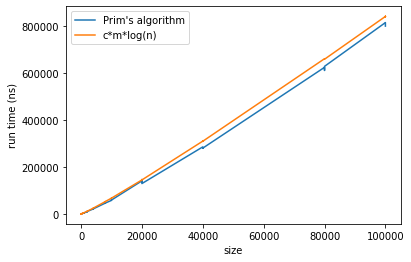

In [16]:
# PRIM
reference_prim = [c_prim*m*math.log(n) for n,m in zip(sorted_sizes,num_edges)]
plt.plot(sorted_sizes, sorted_runtimes_prim)
plt.plot(sorted_sizes, reference_prim)
plt.legend(["Prim's algorithm", "c*m*log(n)"])
plt.ylabel('run time (ns)')
plt.savefig('prim_plot.png', dpi=300)
plt.xlabel('size')
plt.show()

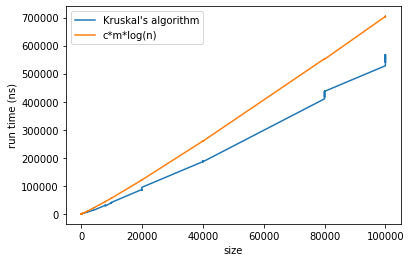

In [17]:
# KRUSKAL EFFICIENT
reference_kruskal = [c_kruskal*m*math.log(n) for n,m in zip(sorted_sizes,num_edges)]
plt.plot(sorted_sizes, sorted_runtimes_kruskal)
plt.plot(sorted_sizes, reference_kruskal)
plt.legend(["Kruskal's algorithm", "c*m*log(n)"])
plt.ylabel('run time (ns)')
plt.xlabel('size')
plt.savefig('kruskal_efficient_plot.png', dpi=300)
plt.show()

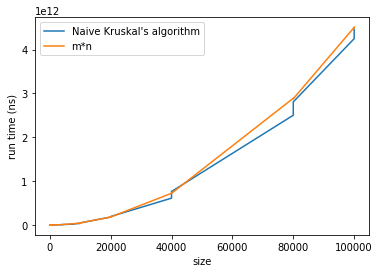

In [18]:
# NAIVE KRUSKAL
reference_naive_kruskal = [c_naive_kruskal*m*n for n,m in zip(sorted_sizes,num_edges)]
plt.plot(sorted_sizes, sorted_runtimes_naive_kruskal)
plt.plot(sorted_sizes, reference_naive_kruskal)
plt.legend(["Naive Kruskal's algorithm", "m*n"])
plt.ylabel('run time (ns)')
plt.xlabel('size')
plt.show()

Here are some comparisons: first, let's see how Prim's and Kruskal's implementation with Union Find perform with respect to one another. From the plot below we can tell that although the two algorithms have a similar behavior with the increase of the size, Prim seems the one to perform best, as its plot is below the orange line representing Kruskal's.

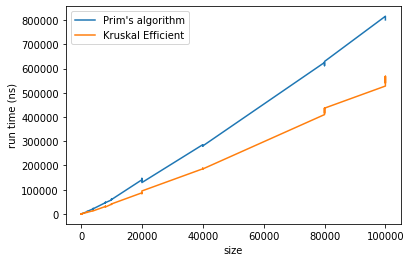

In [19]:
plt.plot(sorted_sizes, sorted_runtimes_prim)
plt.plot(sorted_sizes, sorted_runtimes_kruskal)
plt.legend(["Prim's algorithm", "Kruskal Efficient"])
plt.ylabel('run time (ns)')
plt.xlabel('size')
plt.savefig('prim_kruskal_efficient.png', dpi=300)
plt.show()

The same comparison (Prim-Efficient Kruskal) can be done in a logarithmic scale:

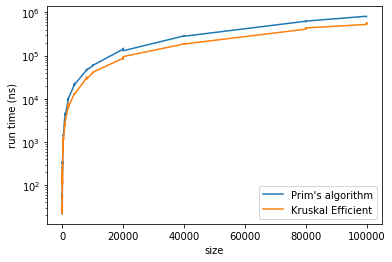

In [20]:
plt.plot(sorted_sizes, sorted_runtimes_prim)
plt.plot(sorted_sizes, sorted_runtimes_kruskal)
plt.yscale("log")
plt.legend(["Prim's algorithm", "Kruskal Efficient"])
plt.ylabel('run time (ns)')
plt.xlabel('size')
plt.savefig('prim_kruskal_efficient_log.png', dpi=300)
plt.show()

Let's now compare the three algorithms altogether:

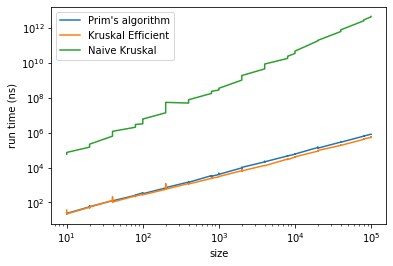

In [24]:
fig,ax = plt.subplots()
ax.plot(sorted_sizes, sorted_runtimes_prim)
ax.plot(sorted_sizes, sorted_runtimes_kruskal)
plt.plot(sorted_sizes, sorted_runtimes_naive_kruskal)
plt.legend(["Prim's algorithm", "Kruskal Efficient","Naive Kruskal"])
plt.ylabel('run time (ns)')
plt.yscale("log")
plt.xscale("log")
plt.xlabel('size')
plt.savefig('mst_algorithms_comparisons.png', dpi=300)
plt.show()

We plotted the complexities in logarithmic scale, so to better appreciate the differences among them. It is evident that Naive Kruskal is the worst-performing algorithm among the three, as its running time increases along with the size up to surpassing 1e12! Instead, Prim's and Efficient Kruskal's are definitely better-performing algorithms, as expected from their theoretical complexities of O(mlog(n)).